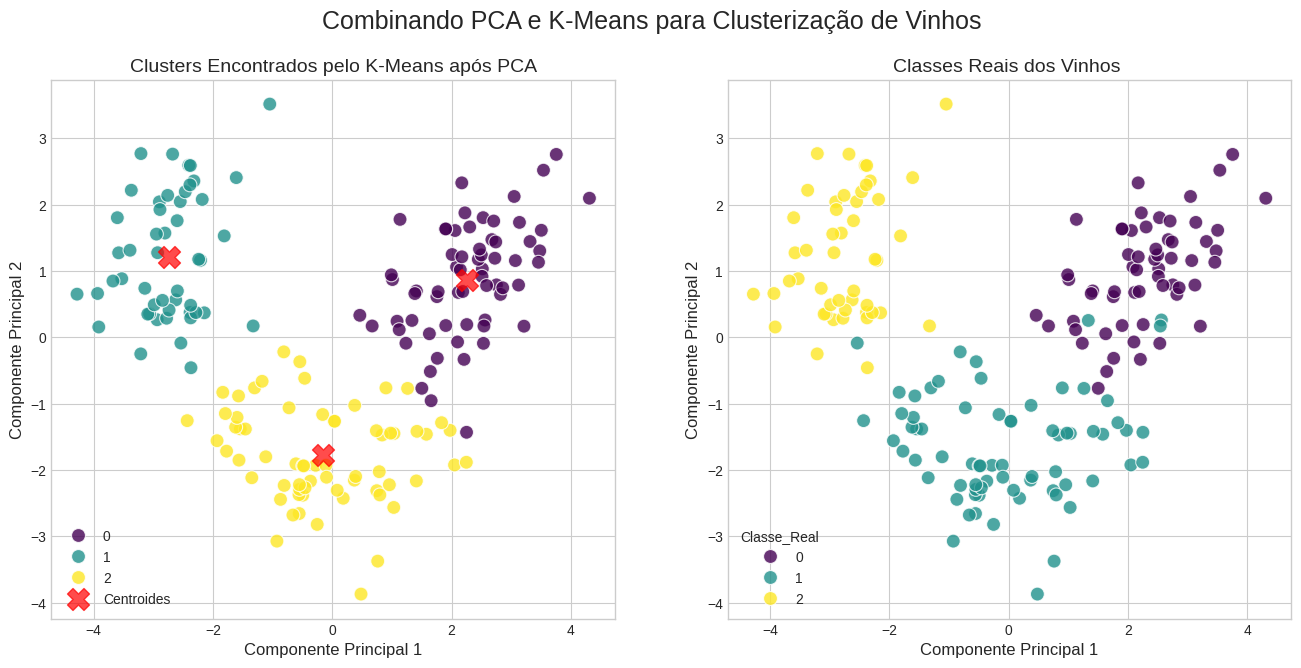

Variância explicada pelos 2 componentes: 55.41%


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

wine_data = load_wine()
X = wine_data.data
y_true = wine_data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)
pca_df['Cluster_KMeans'] = y_kmeans
pca_df['Classe_Real'] = y_true

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

sns.scatterplot(
    x='Componente Principal 1',
    y='Componente Principal 2',
    hue='Cluster_KMeans',
    data=pca_df,
    palette='viridis',
    s=100,
    alpha=0.8,
    ax=ax1
)
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=250, alpha=0.7, marker='X', label='Centroides')
ax1.set_title('Clusters Encontrados pelo K-Means após PCA', fontsize=14)
ax1.set_xlabel('Componente Principal 1', fontsize=12)
ax1.set_ylabel('Componente Principal 2', fontsize=12)
ax1.legend()

sns.scatterplot(
    x='Componente Principal 1',
    y='Componente Principal 2',
    hue='Classe_Real',
    data=pca_df,
    palette='viridis',
    s=100,
    alpha=0.8,
    ax=ax2
)
ax2.set_title('Classes Reais dos Vinhos ', fontsize=14)
ax2.set_xlabel('Componente Principal 1', fontsize=12)
ax2.set_ylabel('Componente Principal 2', fontsize=12)

plt.suptitle('Combinando PCA e K-Means para Clusterização de Vinhos', fontsize=18)
plt.show()

variancia = sum(pca.explained_variance_ratio_) * 100
print(f"Variância explicada pelos 2 componentes: {variancia:.2f}%")
